# Definition:

- $P^n_{t}$: Price of n-period discount bond in year t
- $F^n_{t}$: Face value of n-period bond at year t is fixed at 100
- $p^n_{t} = log(P_{t}/100)$ normalised log price of bond (between -inf to 0, 0 being face value)
- $y^n_{t} = -1/n * p^n_{t}$: Yeild-to-maturity of n-period bond in year t
- $f^n_{t} = p^{n-1}_{t} - p^n_{t}$: 1-year forward rate on n-period bond in year t
- $r^n_{t} = p^{n}_{t+1} - p^n_{t}$: Return on n-period of bond in year t
- $ex^n_{t} = r^n_{t} - y^n_{t}$: Excess Return on n-period of bond in year t

In [82]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
t10y = yf.Ticker("^TNX")
t10y.info

{'exchange': 'NYB',
 'shortName': 'CBOE Interest Rate 10 Year T No',
 'longName': 'Treasury Yield 10 Years',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EDT',
 'isEsgPopulated': False,
 'gmtOffSetMilliseconds': '-14400000',
 'quoteType': 'INDEX',
 'symbol': '^TNX',
 'messageBoardId': 'finmb_INDEXTNX',
 'market': 'us24_market',
 'previousClose': 3.759,
 'regularMarketOpen': 3.763,
 'twoHundredDayAverage': 2.627985,
 'trailingAnnualDividendYield': None,
 'payoutRatio': None,
 'volume24Hr': None,
 'regularMarketDayHigh': 3.8439999,
 'navPrice': None,
 'averageDailyVolume10Day': 0,
 'totalAssets': None,
 'regularMarketPreviousClose': 3.759,
 'fiftyDayAverage': 3.19242,
 'trailingAnnualDividendRate': None,
 'open': 3.763,
 'toCurrency': None,
 'averageVolume10days': 0,
 'expireDate': None,
 'yield': None,
 'algorithm': None,
 'dividendRate': None,
 'exDividendDate': None,
 'beta': None,
 'circulatingSupply': None,
 'startDate': None,
 'regularMarketDayLow': 3

In [106]:
df = t10y.history(period="max")
df = df.reset_index()
df['price'] = (df.High + df.Low)/2
df['year'] = df['Date'].astype(str).str[:4]
df = df[['year', 'price']].groupby('year').mean()
df = df.reset_index()
df['t'] = df.year
df['p'] = np.log(df['price']/100)
df['y'] = 0.1 * - df.p
df['r'] = df.p - df.p.shift(-1)

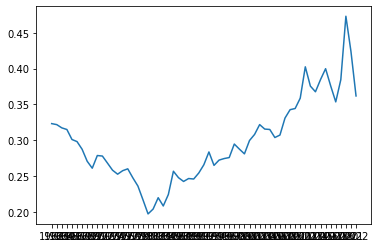

In [107]:
plt.plot(df.t, df.y)

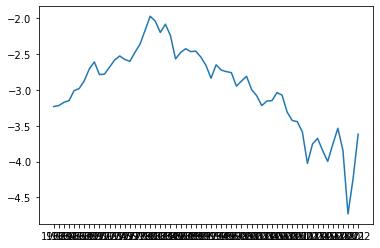

In [108]:
plt.plot(df.t, df.p)

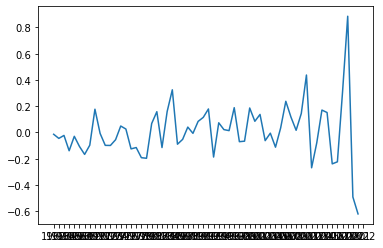

In [109]:
plt.plot(df.t, df.r)